In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import glob
import scipy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

%run ../util.ipynb
%run ../BioE134/model_pipeline/RidgeLSRegression.ipynb
%run ../BioE134/model_pipeline/LassoLSRegression.ipynb
%run ../BioE134/model_pipeline/ElasticNetLSRegression.ipynb

## Import Data Sets

In [2]:
# Raw Data
def load_raw():
    raw_X = []
    raw_Y = []
    for img_path in glob.glob('../raw_data/*.jpg'):
        # Although scipy.misc.imresize is deprecated, leave it in since Matt can't use skimage.transform.resize.
#         raw_X.append(scipy.misc.imresize(cv2.imread(img_path),0.25))
        raw_X.append(cv2.imread(img_path))
        y = img_path[-11:-7].replace('p', '.')
        raw_Y.append(y)

    raw_X = np.asarray(raw_X)
    print(raw_X.shape)
#     raw_X.shape = [raw_X.shape[0], raw_X.shape[1]*raw_X.shape[2]*raw_X.shape[3]]
    print(raw_X.shape)
    raw_Y = np.array(raw_Y).astype('float')[:, np.newaxis] # makes shape (90, 1)

#     raw_XScaler = StandardScaler()
    raw_YScaler = StandardScaler()

#     raw_X = raw_XScaler.fit_transform(raw_X)
    raw_Y = raw_YScaler.fit_transform(raw_Y)

    print('Loaded raw data.')
    
    return raw_X, raw_Y, raw_YScaler

## Ridge Regression

(90, 1334, 1000, 3)
(90, 1334, 1000, 3)
Loaded raw data.
Testing Ridge with lambda:1e-05
Testing Ridge with lambda:0.0001
Testing Ridge with lambda:0.001
Testing Ridge with lambda:0.01
Testing Ridge with lambda:0.1
Testing Ridge with lambda:1
Testing Ridge with lambda:10.0
Testing Ridge with lambda:100.0
{'none': [0.030036872355433435, 0.030036872428741618, 0.030036873162861265, 0.030036880608196547, 0.030036965457712728, 0.030038836488559716, 0.030144651860995048, 0.033602635074477458], 'gamma': [0.077679844271647702, 0.077679841929720689, 0.077679818510979923, 0.077679584376668165, 0.077677248338999014, 0.077654413946367212, 0.077474402761379776, 0.078043212213216445], 'rotate': [1.0459326005931264, 1.0459325967273529, 1.0459325580696281, 1.0459321714934506, 1.045928305838117, 1.0458896599248131, 1.0455042603180207, 1.0417519643686299], 'gamma+rotate': [0.85430946703676958, 0.85430946714232159, 0.8543094681978497, 0.85430947875385888, 0.85430958438457139, 0.85431064775166143, 0.85432

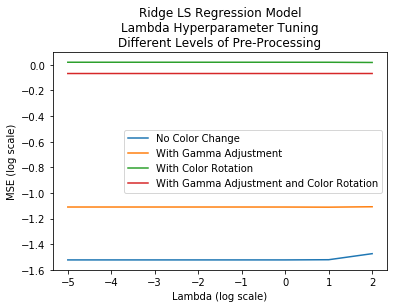

In [3]:
X, Y, YScaler = load_raw()
test_errors = {'none' : [], 'gamma' : [], 'rotate' : [], 'gamma+rotate' : []}
lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
for l in lmdas:
    print("Testing Ridge with lambda:{}".format(l))
    ridge_m = RidgeLSRegressionModel(l)
    test_errors['none'].append(computeRecoloredTestErrorAndAccuracy(ridge_m, X, Y)[0])
    test_errors['gamma'].append(computeRecoloredTestErrorAndAccuracy(ridge_m, X, Y, 
                                                                     color_options={'gamma' : True, 
                                                                                   'rotate' : False})[0])
    test_errors['rotate'].append(computeRecoloredTestErrorAndAccuracy(ridge_m, X, Y, 
                                                                      color_options={'gamma' : False, 
                                                                                   'rotate' : True})[0])
    test_errors['gamma+rotate'].append(computeRecoloredTestErrorAndAccuracy(ridge_m, X, Y, 
                                                                            color_options={'gamma' : True, 
                                                                                           'rotate' : True})[0])

{'none': [0.030036872355433435, 0.030036872428741618, 0.030036873162861265, 0.030036880608196547, 0.030036965457712728, 0.030038836488559716, 0.030144651860995048, 0.033602635074477458], 'gamma': [0.077679844271647702, 0.077679841929720689, 0.077679818510979923, 0.077679584376668165, 0.077677248338999014, 0.077654413946367212, 0.077474402761379776, 0.078043212213216445], 'rotate': [1.0459326005931264, 1.0459325967273529, 1.0459325580696281, 1.0459321714934506, 1.045928305838117, 1.0458896599248131, 1.0455042603180207, 1.0417519643686299], 'gamma+rotate': [0.85430946703676958, 0.85430946714232159, 0.8543094681978497, 0.85430947875385888, 0.85430958438457139, 0.85431064775166143, 0.85432198398265891, 0.85450230653476711]}


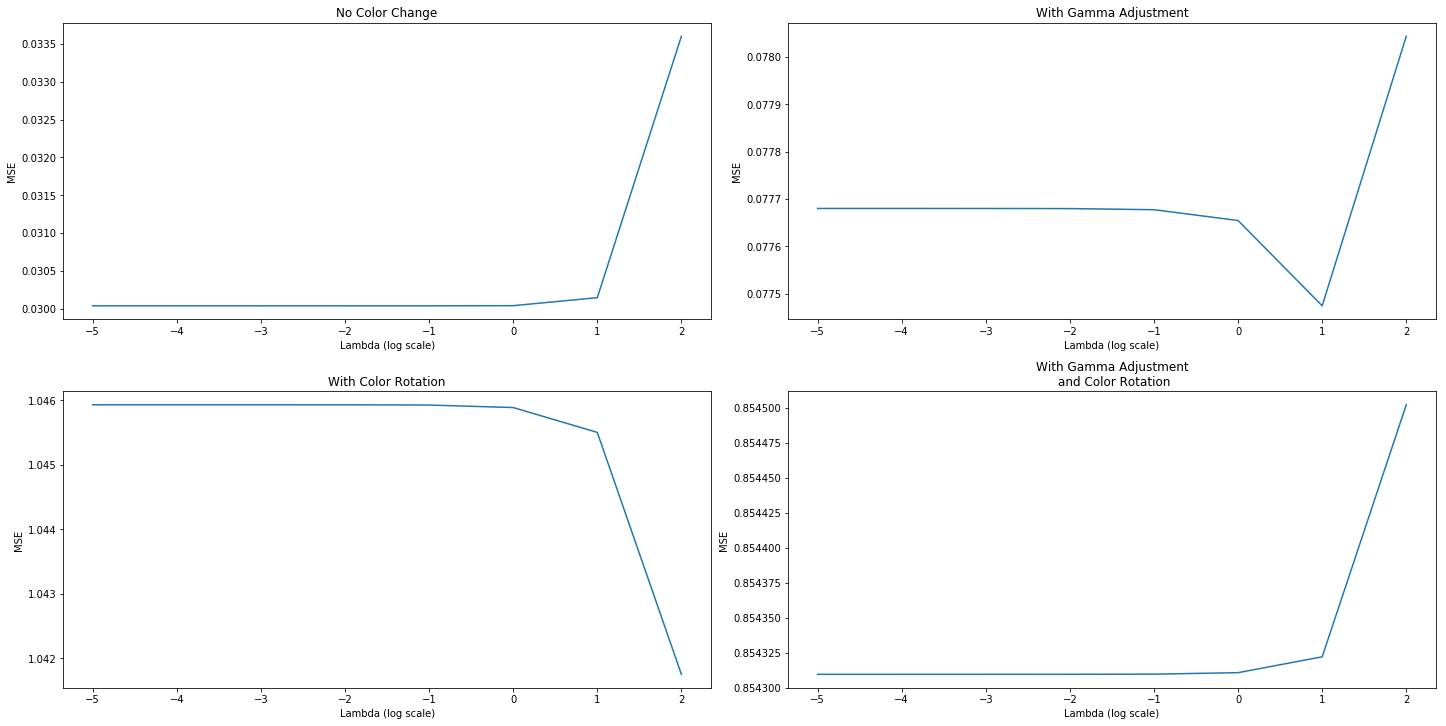

In [32]:
print(test_errors)
# plt.plot(np.log10(lmdas), np.log10(test_errors['none']), label="No Color Change")
# plt.plot(np.log10(lmdas), np.log10(test_errors['gamma']), label="With Gamma Adjustment")
# plt.plot(np.log10(lmdas), np.log10(test_errors['rotate']), label="With Color Rotation")
# plt.plot(np.log10(lmdas), np.log10(test_errors['gamma+rotate']), label="With Gamma Adjustment and Color Rotation")
# plt.legend(['Raw Data', 'Masked Data', 'Color Extracted Data'])

log_lmdas = np.log10(lmdas)
labels = ["No Color Change", "With Gamma Adjustment", "With Color Rotation", "With Gamma Adjustment\n and Color Rotation"]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax1.plot(log_lmdas, test_errors['none'], label=labels[0])
ax2.plot(log_lmdas, test_errors['gamma'], label=labels[1])
ax3.plot(log_lmdas, test_errors['rotate'], label=labels[2])
ax4.plot(log_lmdas, test_errors['gamma+rotate'], label=labels[3])

for ax, title in zip([ax1, ax2, ax3, ax4], labels):
    
    ax.set_xlabel('Lambda (log scale)')
    ax.set_ylabel('MSE')
    ax.set_title(title)

# plt.legend()
# plt.xlabel('Lambda (log scale)')
# plt.ylabel('MSE (log scale)')
# plt.title('Ridge LS Regression Model\nLambda Hyperparameter Tuning\nDifferent Levels of Pre-Processing')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("Ridge Hyperparameter Tuning with Different Color Preprocessing Schemes")
plt.show()

In [34]:
mean_errors = [np.mean(test_errors['none']), np.mean(test_errors['gamma']), 
              np.mean(test_errors['rotate']), np.mean(test_errors['gamma+rotate'])]
lowest_errors = [np.argmin(test_errors['none']), np.argmin(test_errors['gamma']), 
                np.argmin(test_errors['rotate']), np.argmin(test_errors['gamma+rotate'])]
lowest_errors
# plt.figure(figsize=(15,10))
# plt.bar(range(4), mean_errors)
# plt.title("Avg Test MSE (across k=10 folds) for each Color Preprocessing Technique", fontsize=15)
# plt.xticks(range(4), labels, fontsize=15)
# plt.xlabel("Color Preprocessing Technique", fontsize=15)
# plt.ylabel("Mean Squared Error", fontsize=15)
# plt.savefig("Bar Chart MSE for each Color Preprocessing Technique")
# plt.show()

[0, 6, 7, 0]

Loaded color extracted data.
Loaded color extracted data.
Loaded color extracted data.
Loaded color extracted data.


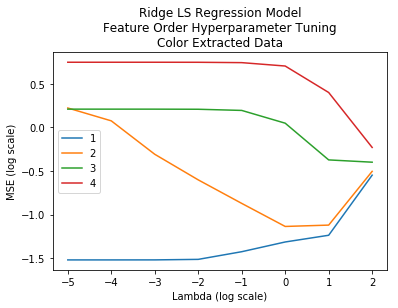

In [13]:
polyFeatureList = range(1,5)
for polyFeatures in polyFeatureList:
    X, Y, YScaler = load_color(polyFeatures=polyFeatures)
    test_errors = []
    lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
    for l in lmdas:
        ridge_m = RidgeLSRegressionModel(l)
        test_errors += [computeTestError(ridge_m, X, Y, YScaler)]
    plt.plot(np.log10(lmdas), np.log10(test_errors))
plt.legend(polyFeatureList)
plt.xlabel('Lambda (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('Ridge LS Regression Model\nFeature Order Hyperparameter Tuning\nColor Extracted Data')
plt.show()

## Lasso Regression

c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


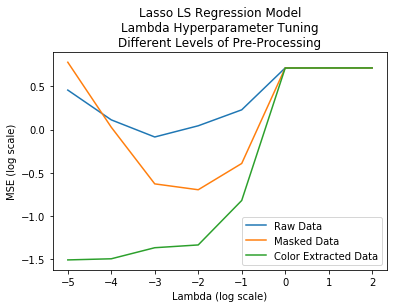

In [24]:
for loader in [load_raw, load_masked, load_color]:
    X, Y, YScaler = loader()
    test_errors = []
    lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
    for l in lmdas:
        lasso_m = LassoLSRegressionModel(l)
        test_errors += [computeTestError(lasso_m, X, Y, YScaler)]
    plt.plot(np.log10(lmdas), np.log10(test_errors))
plt.legend(['Raw Data', 'Masked Data', 'Color Extracted Data'])
plt.xlabel('Lambda (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('Lasso LS Regression Model\nLambda Hyperparameter Tuning\nDifferent Levels of Pre-Processing')
plt.show()

Loaded color extracted data.
Loaded color extracted data.


c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Loaded color extracted data.
Loaded color extracted data.


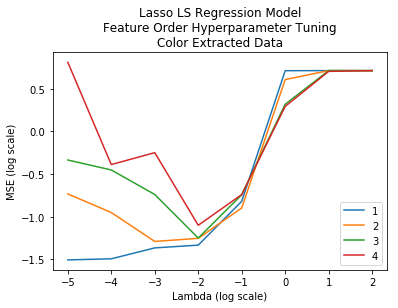

In [14]:
polyFeatureList = range(1,5)
for polyFeatures in polyFeatureList:
    X, Y, YScaler = load_color(polyFeatures=polyFeatures)
    test_errors = []
    lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
    for l in lmdas:
        lasso_m = LassoLSRegressionModel(l)
        test_errors += [computeTestError(lasso_m, X, Y, YScaler)]
    plt.plot(np.log10(lmdas), np.log10(test_errors))
plt.legend(polyFeatureList)
plt.xlabel('Lambda (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('Lasso LS Regression Model\nFeature Order Hyperparameter Tuning\nColor Extracted Data')
plt.show()

## Elastic Net Regression

c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Loaded raw data.


c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Completed  0.0 .
Completed  0.25 .
Completed  0.5 .
Completed  0.75 .
Completed  1.0 .


c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Loaded masked data.
Completed  0.0 .
Completed  0.25 .
Completed  0.5 .
Completed  0.75 .
Completed  1.0 .
Loaded color extracted data.
Completed  0.0 .
Completed  0.25 .
Completed  0.5 .
Completed  0.75 .
Completed  1.0 .


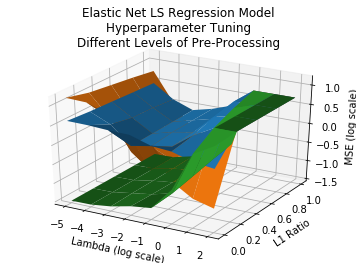

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for loader in [load_raw, load_masked, load_color]:
    X, Y, YScaler = loader()
    lmdas = []
    l1_ratios = []
    test_errors = []
    for l1_ratio in np.arange(0, 1.1, 0.25):
        curr_lmdas = []
        curr_l1_ratios = []
        curr_test_errors = []
        for l in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]:
            elastic_m = ElasticNetLSRegressionModel(l, l1_ratio)
            curr_lmdas += [l]
            curr_l1_ratios += [l1_ratio]
            curr_test_errors += [computeTestError(elastic_m, X, Y, YScaler)]
        lmdas += [curr_lmdas]
        l1_ratios += [curr_l1_ratios]
        test_errors += [curr_test_errors]
        print('Completed ', l1_ratio, '.')
    ax.plot_surface(np.log10(lmdas), np.asarray(l1_ratios), np.log10(test_errors))
    
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('MSE (log scale)')
plt.title('Elastic Net LS Regression Model\nHyperparameter Tuning\nDifferent Levels of Pre-Processing')
plt.show()

## Color Extracted Data Projections

In [6]:
def get_random_proj():
    '''
    Return A which is size 2 by 12
    '''
    return np.random.normal(0, 1, [2,12])

def pca_projection(X,Y):
    '''
    Return U_2^T
    '''
    X, _ = subtract_mean_from_data(X, X)
    Sigma_XX = compute_covariance_matrix(X, X)
    U,_,_ = np.linalg.svd(Sigma_XX)
    return U[:,0:2].T

def cca_projection(X,Y,k=2):
    '''
    Return U_K^T, \Simgma_{XX}^{-1/2}
    '''
    reg = 1e-5

    Y = create_one_hot_label(Y, max(Y)+1)
    X, _ = subtract_mean_from_data(X, X)
    Sigma_XX = compute_covariance_matrix(X, X)
    Sigma_XY = compute_covariance_matrix(X, Y)
    Sigma_YY = compute_covariance_matrix(Y, Y)
    
    U, S, V = np.linalg.svd(Sigma_XX)
    S = np.linalg.inv(scipy.linalg.sqrtm(np.diag(S)+reg*np.identity(len(S))))
    Sigma_XX_neghalf = U.dot(S).dot(V)

    U, S, V = np.linalg.svd(Sigma_YY)
    S = np.linalg.inv(scipy.linalg.sqrtm(np.diag(S)+reg*np.identity(len(S))))
    Sigma_YY_neghalf = U.dot(S).dot(V)
    
    canonical_correlation_matrix = Sigma_XX_neghalf.dot(Sigma_XY).dot(Sigma_YY_neghalf)
    U, _, _ = np.linalg.svd(canonical_correlation_matrix)
    return U[:,0:k].T, Sigma_XX_neghalf

In [7]:
def project_data(projection,X,Y, white = np.eye(2), plot_title=''):
    '''
    Takes list of state space and class labels
    State space should be 2D
    Labels shoud be int
    '''
    point_sets = {}
    # Make a point set for each possible class.
    classes = np.unique(Y)
    for c in range(len(classes)):
        point_sets[classes[c]] = []
        
    # Project all Data
    X_P = np.matmul(projection, np.array(X).T)
    for i in range(len(Y)):
        point_sets[Y[i]] += [X_P[:,i]]

    for c in [str(round(i,2)) for i in np.sort([float(c) for c in classes])]:
        point_sets[c] = np.vstack(point_sets[c])
        plt.scatter(np.array(point_sets[c][:,0]),np.array(point_sets[c][:,1]),label = c)
    plt.title(plot_title)
    plt.legend()
    plt.show()

Loaded color extracted data.


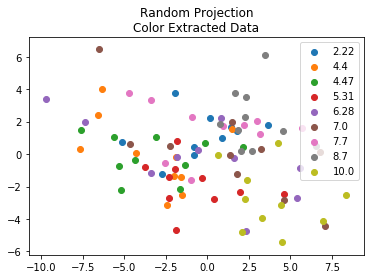

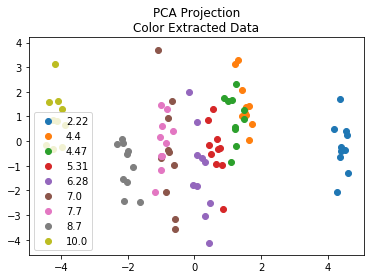

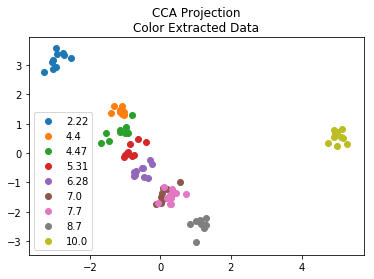

In [9]:
X, Y, YScaler = load_color()
Y = YScaler.inverse_transform(Y)
Y = np.ndarray.tolist(Y)
# Convert classes to strings.
for i in range(len(Y)):
    Y[i] = str(round(Y[i][0],2))
    
feat_dim = max(X[0].shape)
np.random.seed(0)

# Random Projection
project_data(get_random_proj(), X, Y, plot_title='Random Projection\nColor Extracted Data')

#PCA Projection
project_data(pca_projection(X,Y), X, Y, plot_title='PCA Projection\nColor Extracted Data')

#CCA Projection
cca_proj, white_cov = cca_projection(X,[round(float(y)) for y in Y])
project_data(cca_proj, X, Y, white = white_cov, plot_title='CCA Projection\nColor Extracted Data')